<a href="https://colab.research.google.com/github/DanielleRomanoff/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/Backprop_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backpropagation Practice

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [0]:
import numpy as np
import pandas as pd

In [52]:
# X = (three random variables provided to us), y = random output provided to us.

X = np.array(([0,  0, 1], [0 , 1, 1],  [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1], [0, 0, 0]), dtype=float)
y = np.array(([0], [1], [1], [1], [1], [0], [0]), dtype=float)

print("Random Data Provided \n", X)
print("Correct Score Provided \n", y)

Random Data Provided 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Correct Score Provided 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]


In [53]:
X = X/np.amax(X, axis=0)
y = y/100

print("x1, x2, x3\n", X)
print("result \n", y)

x1, x2, x3
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
result 
 [[0.  ]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.  ]
 [0.  ]]


In [0]:
class Neural_Network(object):
  def __init__(self):
    self.inputs = 3
    self.hiddenNodes = 4
    self.outputNodes = 1
    
    # Initlize Weights
    self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) # (3x4)
    self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes) # (4x1)

In [55]:
NN = Neural_Network()

print("Layer 1 weights: \n", NN.L1_weights)
print("Layer 2 weights: \n", NN.L2_weights)

Layer 1 weights: 
 [[ 0.58258931 -0.94761652 -1.64016383 -0.62039967]
 [ 0.98295391  0.59240063 -0.96739967  0.83036637]
 [-1.44480123  0.06547853 -0.7388708   0.2889503 ]]
Layer 2 weights: 
 [[ 0.38514161]
 [-1.43637815]
 [-0.88530046]
 [-1.38899288]]


In [0]:
class Neural_Network(object):
  def __init__(self):
    self.inputs = 3
    self.hiddenNodes = 4
    self.outputNodes = 1

    # Initlize Weights
    self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) # (3x4)
    self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes) # (4x1)

  def feed_forward(self, X):
    # Weighted sum between inputs and hidden layer
    self.hidden_sum = np.dot(X, self.L1_weights)
    # Activations of weighted sum
    self.activated_hidden = self.sigmoid(self.hidden_sum)
    # Weighted sum between hidden and output
    self.output_sum = np.dot(self.activated_hidden, self.L2_weights)
    # final activation of output
    self.activated_output = self.sigmoid(self.output_sum)
    return self.activated_output
    
  def sigmoid(self, s):
    return 1/(1+np.exp(-s))

In [57]:
NN = Neural_Network()
output = NN.feed_forward(X[0])
print("output: ", output)

output:  [0.63015721]


## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train, x_test = X_train / 255.0, X_test / 255.0

(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

0


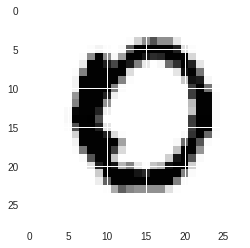

In [135]:
image_index = 4444 
print(y_train[image_index]) # The label is 8
plt.imshow(X_train[image_index], cmap='Greys')

In [136]:
X_train.shape   # 60000 images, 28 pixels x 28 pixels

(60000, 28, 28)

In [137]:
# Adding a bias dimension because of Keras
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# We want floats
X_train = X_train.astype('float')
X_test = X_test.astype('float')

# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in X_train 60000
Number of images in X_test 10000


In [161]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [162]:
# check MNIST training images matrix shape
mnist.train.images.shape

(55000, 784)

In [0]:
# check MNIST training images matrix data
sample_img = mnist.train.images[5].reshape(28, 28)
sample_img

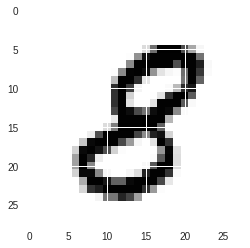

In [164]:
# plot the image
plt.imshow(sample_img).set_cmap('Greys')

In [165]:
# check MNIST labels shape
mnist.train.labels.shape

(55000, 10)

In [166]:
# show MNIST label data
sample_label = mnist.train.labels[5]
sample_label

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [167]:
# define a neural network (softmax logistic regression)
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b) # the equation
y

<tf.Tensor 'Softmax_2:0' shape=(?, 10) dtype=float32>

In [168]:
# define the train step to minimize the cross entropy with SGD
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
train_step

<tf.Operation 'GradientDescent_3' type=NoOp>

In [0]:
# 1000 times of mini batching
# initialize variables and session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# train the model mini batch with 100 elements, for 1K times
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [170]:
# evaluate the accuracy of the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.914


## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?